## Coherent sampling and the FFT harmonic amplitudes

Jupyter Notebook code based on this [original article](https://wordpress.com/block-editor/post/horacioarnaldi.wordpress.com/53), located at my [personal page](https://wordpress.com/customize/horacioarnaldi.wordpress.com)

&copy; 2020 L. Horacio Arnaldi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## Coherent sampling

The ADC dynamic performance tests sometimes requires a frequency transformation of the captured data register using the Discrete Fourier Transform (DFT) or the Fast Fourier Transform (FFT). A FFT produces the same results as the DFT, but minimizes the processing requirements by taking advantage of computational symmetries and redundancies within a DFT analysis. By speeding up the computation, this approach enables virtual real-time spectral analysis. As long as a periodic input signal is sampled often enough (that is, $\geq 2 \times f_\text{MAX}$, where $f_\text{MAX}$ is the maximum bandwidth of the test tone sine input, not the bandwidth of the data converter to be tested), the pair of DFT equations is defined as
$$
\begin{equation}\label{eq:ap1_IDFT}
        x[n] = \frac{1}{N}\sum_{k=0}^{N-1}X[k]e^{-j2\pi kn}
\end{equation}
$$
$$
\begin{equation}\label{eq:ap1_DFT}
        X[k] = \sum_{n=0}^{N-1}x[n]e^{j\frac{2\pi}{N} kn}
\end{equation}
$$
The acquired data record generally contains sinusoidal, harmonic input signals, intermodulation products, and other spurious signals that must be analyzed to properly characterize an ADC. Assuming that all input signals are periodic, the DFT of a data record that does not contain an integer number of cycles of all sinusoidal input signals will contain spectral components at frequencies other than corresponding to the chosen input tones. Also known as spectral leaks, these components should be avoided because they mask the ADC's own performance. For accurate characterization, spectral leakage should be kept to a minimum by choosing the appropriate input tones (relative to $ f_s $) and by using high-precision, low-noise signal sources.

To avoid spectral leakage entirely, the consistent sampling method is recommended. Consistent sampling requires that the input frequency and clock generators be locked in phase and that the input frequency be chosen according to this relationship:
$$
\begin{equation}\label{eq:ap2_DFT}
        \frac{f_\text{IN}}{f_s} =
        \frac{N_\text{WINDOW}}{N_\text{RECORD}}
\end{equation}
$$
where $f_\text{IN} $ is the desired input frequency, $f_s$ is the clock frequency of the data converter under test, $ N_\text{WINDOW}$ is the number of cycles in the data window (for all samples to be unique, choose odd or prime numbers) and $N_\text{RECORD}$ is the length of the data record ( for a FFT of 8192 points, the data record contains 8192 points).

Because the ratio of $f_\text{IN} $ and $f_s$ is an integer value, the signal and clock sources must have adequate frequency tuning resolution to avoid spectral leakage \tag{1}

[1]:[MaximAN728][MaximAN641].

Let's import the necessary

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sg
from scipy.fftpack import fft, fftfreq
#plt.xkcd() #if you want some funny plotting style

Filter specifications and some working theory.

In [2]:
Fs = 800      # sampling frequency
N  = 1000     # Number of samplepoints
Ts = 1.0 / Fs # sample spacing
n  = np.arange(N)
#n  = np.linspace(0,N*Ts,N)
#s=np.array([0.7*np.sin(2.0*np.pi*(50/Fs)*n), np.sin(2.0*np.pi*(80/Fs)*n), 2.0*np.sin(2.0*np.pi*(160/Fs)*n)])
s=np.array([0.7*np.exp(2.0j*np.pi*(20/Fs)*n), np.exp(2.0j*np.pi*(80/Fs)*n), 2.0*np.exp(2.0j*np.pi*(160/Fs)*n)])
y = np.sum(s, axis=0)
sf = fft(y)
nf = fftfreq(N,d=1/Fs)

Simple test

<IPython.core.display.Javascript object>


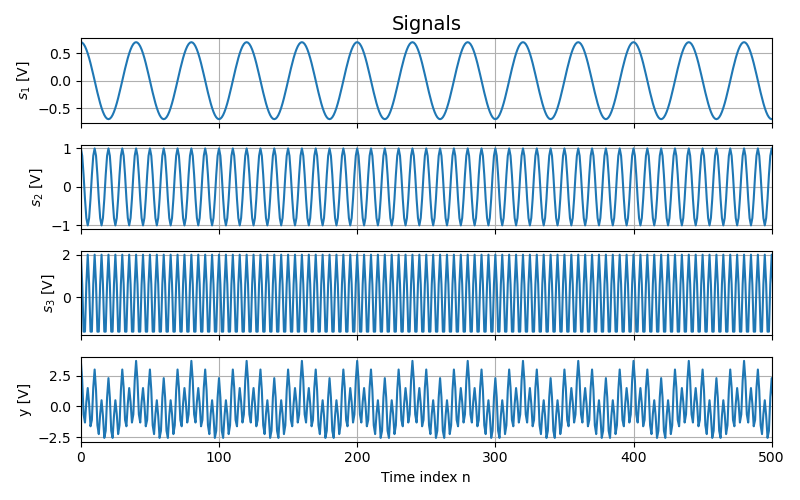

In [3]:
fig,axs = plt.subplots(4,1, sharex=True,figsize=(8,5))
#fig.set_size_inches((8,6))
#fig.suptitle('Signals',fontsize=14)

for k in range(3):
    ax=axs[k]
    ax.plot(n,s[k].real)
    #ax.legend(loc=0,fontsize=16)
    #ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    #ax.set_ylabel(r'dB',fontsize=22)
    #ax.set_ylabel('ch{}[mV?]'.format(k+1),fontsize=14)
    ax.set_ylabel(r'$s_{}$ [V]'.format(k+1))
    ax.grid()

ax=axs[3]
ax.plot(n,y.real)
ax.set_ylabel('y [V]')
ax.set_xlabel('Time index n')
ax.set_xlim(0,500)
ax.grid()
axs[0].set_title('Signals',fontsize=14)
plt.tight_layout()
plt.savefig('media/3_signals.png')

<IPython.core.display.Javascript object>


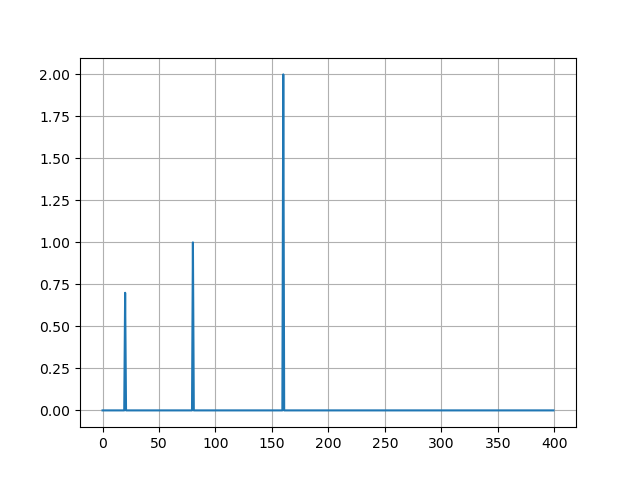

In [4]:
fig, ax = plt.subplots()
#ax.plot(nf[:int(N/2)], 2.0/N * np.abs(sf[0:int(N/2)]))
ax.plot(nf[:int(N/2)], 1.0/N * np.abs(sf[0:int(N/2)]))
#ax.plot(xf[:int(N/2)], np.abs(yf[0:int(N/2)])/N)
ax.grid()